In [1]:
#import important libraries
import pandas as pd
import numpy as np
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import preprocessing
from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids
from factor_analyzer import FactorAnalyzer

from prince import FAMD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import  traain dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

df.head()
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [4]:
#finding count of missing values in each column
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

DATA PREPROCESSING


In [5]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Liver_disease']
## RENAMED RESULT AS Liver_disease
# Renaming Done
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
#unique values in Liver_disease variable
values_in_Liver_disease = df["Liver_disease"].unique()
print(values_in_Liver_disease)

#recoding Liver_disease variable - 2 means dont have disease - converted that to 0; 1 remains the same
df['Liver_disease'] = df['Liver_disease'].replace(2, 0)
print(df["Liver_disease"].unique())

[1 2]
[1 0]


In [7]:
#encoding Gender column into categorical data 
LabelEncoder = LabelEncoder()
df['is_male'] = LabelEncoder.fit_transform(df['Gender'])
df = df.drop(columns='Gender')
df =  df.rename(columns={'is_male':'Gender'}, inplace=False)

#new gender column where male=1 and female=0

In [8]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease,Gender
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [9]:
#dropping null values - does not affect data
df = df.dropna()

In [10]:
#finding count of missing values in each column
df.isna().sum()

Age                                     0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Liver_disease                           0
Gender                                  0
dtype: int64

In [11]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [12]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease,Gender
count,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000,27666.000000
mean,44.104460,3.408686,1.541379,289.851876,81.295489,112.209788,6.472201,3.124680,0.943883,0.716873,0.760862
std,15.972032,6.343109,2.894564,239.188932,181.567045,285.494878,1.082415,0.791945,0.323851,0.450526,0.467635
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,1.000000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,1.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,2.000000


In [13]:
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total persons with liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons without liver disease :  7833 and its percentage is 28.31 %
Total persons with liver disease :  19833 and its percentage is 71.69 %


DATA SET IS UNBALANCED WE HATE TO APPLY SMOTE UPSAMPLING AND DOWNSAMPLING

In [14]:
df.skew(axis = 0, skipna = True) 

Age                                      0.020470
Total_Bilirubin                          4.663518
Direct_Bilirubin                         3.144359
Alkphos_Alkaline_Phosphotase             3.764795
Sgpt_Alamine_Aminotransferase            6.517181
Sgot_Aspartate_Aminotransferase         10.358753
Total_Protiens                          -0.304125
ALB_Albumin                             -0.046914
A/G_Ratio_Albumin_and_Globulin_Ratio     1.076229
Liver_disease                           -0.962823
Gender                                  -0.670711
dtype: float64

TEST TRAIN SPLIT

In [15]:
X = df.drop(columns=['Liver_disease'])
y = df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [16]:
#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)

FITTING MODELS

LOGISTIC REGRESSION

In [17]:
lr = LogisticRegression()
result = lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  72.43 %
Misclassification rate of this model:  27.57 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.526     0.198     0.288      1556
           1      0.748     0.930     0.829      3978

    accuracy                          0.724      5534
   macro avg      0.637     0.564     0.558      5534
weighted avg      0.685     0.724     0.677      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  308 |                 1248 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  278 |                 3700 |
+-----------------+----------------------+----------------------+


SVM

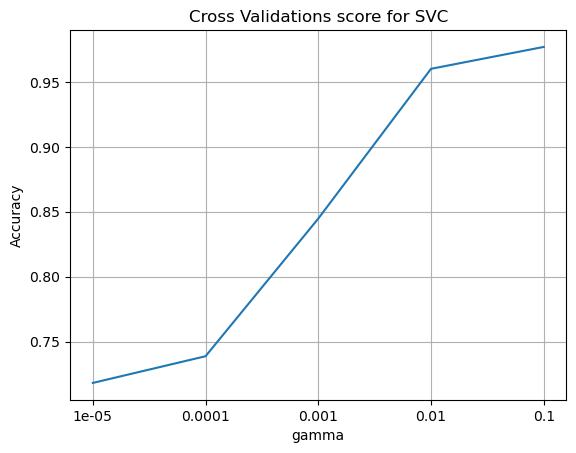

In [18]:
g = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hist = []
for val in g:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in g], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [19]:
svm = SVC(kernel= "linear",C=0.025, random_state = 0 , gamma=0.00001)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  71.88 %
Misclassification rate of this model:  28.12 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.000     0.000     0.000      1556
           1      0.719     1.000     0.836      3978

    accuracy                          0.719      5534
   macro avg      0.359     0.500     0.418      5534
weighted avg      0.517     0.719     0.601      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                    0 |                 1556 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3978 |
+-----------------+----------------------+----------------------+


DECISION TREE

In [20]:
dt = DecisionTreeClassifier(random_state=28)
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.9995933326603348


In [21]:
dtree = DecisionTreeClassifier(max_depth = None,  min_samples_split = 4, min_samples_leaf = 1, max_features = 'auto' #but auto is optimal for some reason its not working for me
                               , random_state = 28)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.96 %
Misclassification rate of this model:  0.04 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.999     0.999     0.999      1556
           1      1.000     1.000     1.000      3978

    accuracy                          1.000      5534
   macro avg      1.000     1.000     1.000      5534
weighted avg      1.000     1.000     1.000      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1555 |                    1 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    1 |                 3977 |
+-----------------+----------------------+----------------------+


RANDOM FOREST

In [22]:
np.random.seed(28)

rf = RandomForestClassifier(random_state=28)
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
0.9998192805088031


In [23]:
rf = RandomForestClassifier(n_estimators=70, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2, random_state=28)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.98 %
Misclassification rate of this model:  0.02 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     0.999     1.000      1556
           1      1.000     1.000     1.000      3978

    accuracy                          1.000      5534
   macro avg      1.000     1.000     1.000      5534
weighted avg      1.000     1.000     1.000      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1555 |                    1 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3978 |
+-----------------+----------------------+----------------------+


XGB

In [24]:
np.random.seed(28)

xgb_classifier = xgb.XGBClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100,120,150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}
Best Score: 0.9998644476225307


In [25]:
xgb_classifier = XGBClassifier(n_estimators=90, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features="auto", random_state=28)
xgb_classifier.fit(X_train, y_train)
# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict labels for test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = round(metrics.accuracy_score(y_test, y_pred_xgb) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Calculate misclassification rate
misclassification_rate = round(np.mean(y_test != y_pred_xgb) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_xgb, digits=3))

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.95 %
Misclassification rate of this model:  0.05 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.999     0.999     0.999      1556
           1      0.999     1.000     1.000      3978

    accuracy                          0.999      5534
   macro avg      0.999     0.999     0.999      5534
weighted avg      0.999     0.999     0.999      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1554 |                    2 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    1 |                 3977 |
+-----------------+----------------------+----------------------+


KNN

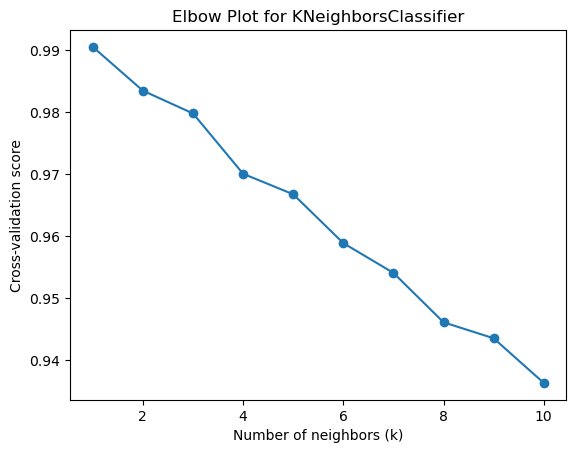

In [26]:
scores = []

k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(score.mean())

plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Cross-validation score')
plt.title('Elbow Plot for KNeighborsClassifier')
plt.show()

In [29]:
np.random.seed(28)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  97.36 %
Misclassification rate of this model:  2.64 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.939     0.969     0.954      1556
           1      0.988     0.975     0.982      3978

    accuracy                          0.974      5534
   macro avg      0.963     0.972     0.968      5534
weighted avg      0.974     0.974     0.974      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1508 |                   48 |
+-----------------+----------------------+----------------------+
| Actual Positive |                   98 |                 3880 |
+-----------------+----------------------+----------------------+


In [ ]:
ADB

In [30]:
np.random.seed(28)

ada_classifier = AdaBoostClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 120, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.8559551129734139


In [31]:
ada_classifier = AdaBoostClassifier(n_estimators=150, learning_rate=1.0, algorithm='SAMME.R', random_state=28)

ada_classifier.fit(X_train, y_train)

y_pred_ada = ada_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred_ada) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

misclassification_rate = round(np.mean(y_test != y_pred_ada) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred_ada, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  85.36 %
Misclassification rate of this model:  14.64 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.800     0.639     0.711      1556
           1      0.869     0.938     0.902      3978

    accuracy                          0.854      5534
   macro avg      0.835     0.788     0.806      5534
weighted avg      0.850     0.854     0.848      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                  994 |                  562 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  248 |                 3730 |
+-----------------+----------------------+----------------------+


GB

In [33]:
np.random.seed(28)

gb_classifier = GradientBoostingClassifier(random_state=28)

param_grid = {
    'n_estimators': [50, 80, 100, 120, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, None],
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 120}
Best Score: 0.9999096351507729


In [34]:
gb_classifier = GradientBoostingClassifier(n_estimators=120, learning_rate=0.1, max_depth = 5, random_state=28)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.95 %
Misclassification rate of this model:  0.05 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.999     0.999     0.999      1556
           1      0.999     1.000     1.000      3978

    accuracy                          0.999      5534
   macro avg      0.999     0.999     0.999      5534
weighted avg      0.999     0.999     0.999      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1554 |                    2 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    1 |                 3977 |
+-----------------+----------------------+----------------------+


MLP

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  95.61 %
Misclassification rate of this model:  4.39 %

Report card of this model: 
              precision    recall  f1-score   support

           0      0.924     0.920     0.922      1556
           1      0.969     0.970     0.969      3978

    accuracy                          0.956      5534
   macro avg      0.946     0.945     0.946      5534
weighted avg      0.956     0.956     0.956      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1431 |                  125 |
+-----------------+----------------------+----------------------+
| Actual Positive |                  118 |                 3860 |
+-----------------+----------------------+----------------------+


ALL THE MODELS COMPARISON UNDER ORIGINAL DATA WITHOUT PCA

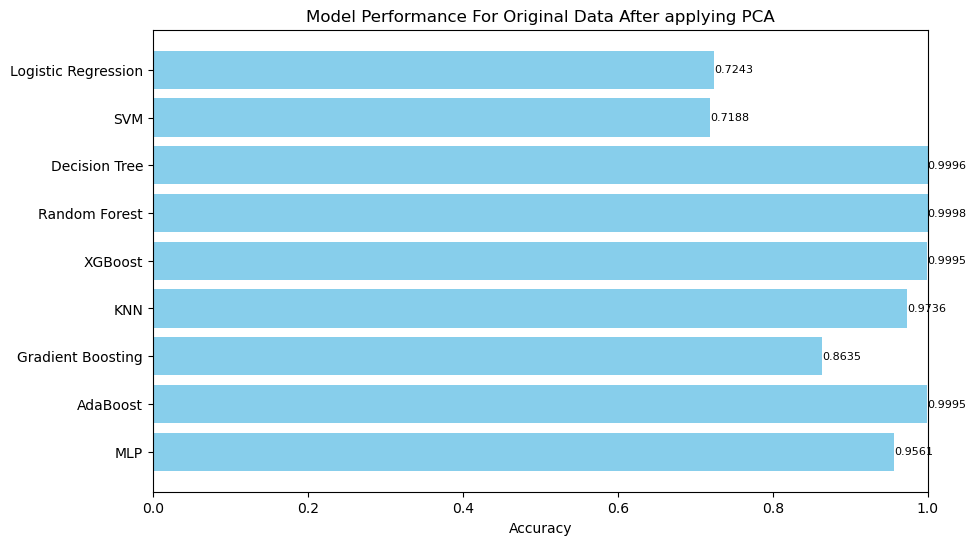

In [38]:
import matplotlib.pyplot as plt

# Define the models and their corresponding scores
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'Gradient Boosting', 'AdaBoost', 'MLP']
scores = [0.7243, 0.7188, 0.9996, 0.9998, 0.9995, 0.9736, 0.8635, 0.9995, 0.9561]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Performance For Original Data After applying PCA')
plt.xlim(0, 1)  # Set the limit for the x-axis from 0 to 1
plt.gca().invert_yaxis()  # Invert y-axis to display models from top to bottom

# Add numerical values to the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.4f}', 
             va='center', ha='left', fontsize=8)

plt.show()
